# Application of Different Machine Learning Algorthms to Precisely Classify Songs According to Music Genre

**Abstract**

Classification of music genre has become an amazing topic for application of machine learning methods for over several years now. Paucity of data regarding genre classification, vagueness in classification as well as unaccountability in categorization of songs into accurate music genre have forced several machine learning scientists to create sophisticated and novel models to accomplish the aforementioned tasks. Our goal here is also to deploy machine learning methods and algorithm in order to identify and classify genres of 6544 songs into 10 categories. Our research focuses on training a model based on training data and training labels and thence, on applying that model on the test data to extract test labels. Primarily, logistic regression has been used for classification of songs. Methods and algorithms like random forest, Bayes classifiers, dimensionality reduction, semi-supervised learning have also been briefly investigated. Finally, the results based on our proposed model are presented and elaborately discussed in the end.

**1 Introduction**

Music today has become a significant part of the internet. Various websites like YouTube, SoundCloud, Amazon Music, Wynk, Spotify, iTunes allow internet users to listen and download music from their databases. However, with the steady rise in the number of music these days, users sometimes find it really difficult to manage the songs they listen to[1]. One way would be to manually categorize the songs based on genre. The genre is a descriptor which is primarily used to organize large collection of music data. Not only is it a crucial data for music databases, but it is the most frequently used item in search queries as well[2][3][4][5][6]. Uptil now, the most common practice of categorizing music is to manually encode music genre information into the digital form of the music[1]. But this genre specification is usually vague and may vary from one music site to the other[1][7]. Moreover, music genres do not bear sound music theoretic foundations[8] – for example, genres may be geographically defined for larger counties like US, Russia, India where the types of the genres vary from one region to the other. Despite all these short-comings, genres still maintain the high weight in any music recommender system[8]. Hence, coming-of-age machine learning methods and models like convolutional neural networks[9], random forest[10], gradient boosting[11] have been previously deployed in order to precisely categorize music genre.  

In this paper, the authors attempt to explore similar machine learning techniques in order to accurately identify and classify music genre based on three main parameters – timbre, pitch (which also contains melody and harmony) and rhythm. The dataset for research is obtained from AllMusic.com. The entire dataset is subdivided into two subsets – training data, which consists of 4363 songs, and test data, which consists of 6544 songs. Each of the songs in both the datasets carry 264 features. Methods like logistic regression, random forest and algorithms like Bayes classifiers, dimensionality reduction (also called principal component analysis) and semi-supervised learning, with the help of Scikit-Learn library in Python[12][13][14][15], are employed in order to identify and classify those songs according to their genres. Prior information on the number of genres, or labels in this case, allowed the authors to focus on training a model from the given training data and labels and apply the same on the test data to acquire the final test labels. 

The rest of this paper is organized as follows. Data Analysis of the provided data is presented in Section 2. Histogram and features per genre are presented in this section. Section 3 contains the methods and experiments employed for the project. Over here, the methods are concisely explained for better understanding of the readers. Results are presented in Section 4. Section 5 deals with discussions on, for example, accuracy of our proposed model and also presents advices for future work on such an interesting classification topic. 


**PREFACE**

Welcome to the DAP report. Before running any sections, please make sure, that you assign right paths to the data files. The path to data files can be found using "os" function, which can be found in the next section.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # import and define shorthand "plt" for library "pyplot" providing plotting functions
import seaborn as sns
import itertools
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
from numpy.random import seed
seed(0)


# THE "OS" FUNCTION - Find the files in directories. Uncomment the next two lines.
#import os
#print(os.listdir())

# Load the data and save it to numpy arrays
train_data_df = pd.read_csv('train_data.csv', header=None) #Read if the data from google, not kaggle data environment
train_labels_df = pd.read_csv('train_labels.csv', header=None)
train_data = train_data_df.values #Dataframe to Numpy
train_labels = train_labels_df.values #Dataframe to Numpy
test_data_df = pd.read_csv('test_data.csv', header=None)
test_data = test_data_df.values #Dataframe to Numpy

# PLOT HISTOGRAM FUNCTION
def plotHistogramFunc(y_true, y_pred):
    class_names = ['Pop_Rock', 'Electronic', 'Rap', 'Jazz', 'Latin', 'RnB', 'International', 'Country', 'Reggae', 'Blues']
    plt.hist(y_true, np.array(range(1,12)), label =("true"), alpha=0.7, align='left')
    plt.hist(y_pred, np.array(range(1,12)), label =("predicted"), alpha=0.5, align='left')
    plt.xticks(np.arange(1,11), class_names, rotation=90)
    plt.legend()
    return

# CONFUSION MATRIX FUNCTION
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
def confusionMatrix(y, y_predicted):
    cnf_matrix = confusion_matrix(y, y_predicted)

    # Plot normalized confusion matrix
    plt.figure(figsize=(7, 7))
    class_names = ['Pop_Rock', 'Electronic', 'Rap', 'Jazz', 'Latin', 'RnB', 'International', 'Country', 'Reggae', 'Blues']
    #class_names = ['Electronic', 'Rap', 'Jazz', 'Latin', 'RnB', 'International', 'Country', 'Reggae', 'Blues']
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
    return

**2 Data analysis**

The data provided is a set of of songs described by the features based on different statistical quantities. The feature set is divided into three sound spectrum analysis parts: rhythm, chroma and MFCC. Each of the parts is divided into several bands (or frequencies): 24, 12 and 12 bands respectively. The number of features is 264.
Feature space in the train data is provided and has a shape of 4363 by 264 and the corresponding label space has a shape of 4363 by 1.

$$ X \in \mathbb{R} ^{N \times d} = \mathbb{R} ^{4363 \times 264}$$
$$ Y \in \mathbb{Z} ^{N \times 1} = \mathbb{Z} ^{4363 \times 1}$$
$$y \in [1, 2, 3, 4, 5, 6 ,7, 8, 9, 10]$$

The test data given have 6544 songs and has same number of features.

$$ X_{\text{test}} \in \mathbb{R} ^{N_{\text{test}} \times d} = \mathbb{R} ^{6544 \times 264}$$

The train data and train labels were used for model training and test data was used for generating test labels, which were then uploaded to the competition web page on kaggle.


**2.1 Histogram**

A better overview of the data is required for prior analysis. A histogram is a useful graph that gives an idea of the class sizes in classification problems. It shows how many songs from each genre train data contains. It can be noted that, train data is heavily biased. There are almost 50% of the songs from one genre - genre number one, which is Pop-Rock. The second popular music genre is Electronic, which has almost four times smaller number of songs. The rest of the genres are divided almost equally.

The training data is biased and that could lead to the biased results. One overpopulated genre (or class) can drag too much attention, raising risk of songs from other genres being classified as Pop-Rock.

The histogram can be seen below.

               Number of songs:
Pop_Rock                   2178
Electronic                  618
Rap                         326
Jazz                        253
Latin                       214
RnB                         260
International               141
Country                     195
Reggae                       92
Blues                        86


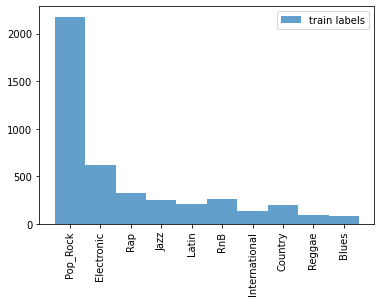

In [2]:
# 2.1 - HISTOGRAM
class_names = ['Pop_Rock', 'Electronic', 'Rap', 'Jazz', 'Latin', 'RnB', 'International', 'Country', 'Reggae', 'Blues']
plt.hist(train_labels, np.array(range(1,12)), label =("train labels"), alpha=0.7, align='left')
plt.xticks(np.arange(1,11), class_names, rotation=90)
plt.legend()

df_hist = pd.DataFrame(data = np.bincount(train_labels.flatten())[1:], index = class_names, columns=['Number of songs:'])
print(df_hist)

**2.2 Features per genre**

In order to get better overview of the feature set, the features are plotted. Features are divided into three sound spectrum analysis parts and then divided again into ten genres. The features are prior-scaled to make the best of plot whitespace. Data is scaled such that the mean is equal to zero and std is equal to one, that is along a column. The mean values and standard deviations (std) are taken within each sound spectrum part and genre and plotted below. 

Plots reveal the different statistics of the data. For instance, the rhythm features are divided into seven statistics, whicl can be clearly distinguished by visual inspection in the plot below. However, no conclusions can be drawn nor any predictions can be made about the genre specific features. The mean and std values looks very similar from genre to genre and it is almost next to impossible to distinguish plot of one genre from another.

Still, some details can be noted. The "mean" statistic of the MFCC feature set has almost zero mean and zero std (which can be seen on the left-most side of the plot). Features with such properties can hardly provide any valuable info regarding classification. This part of the feature set can be excluded in further modelling. 

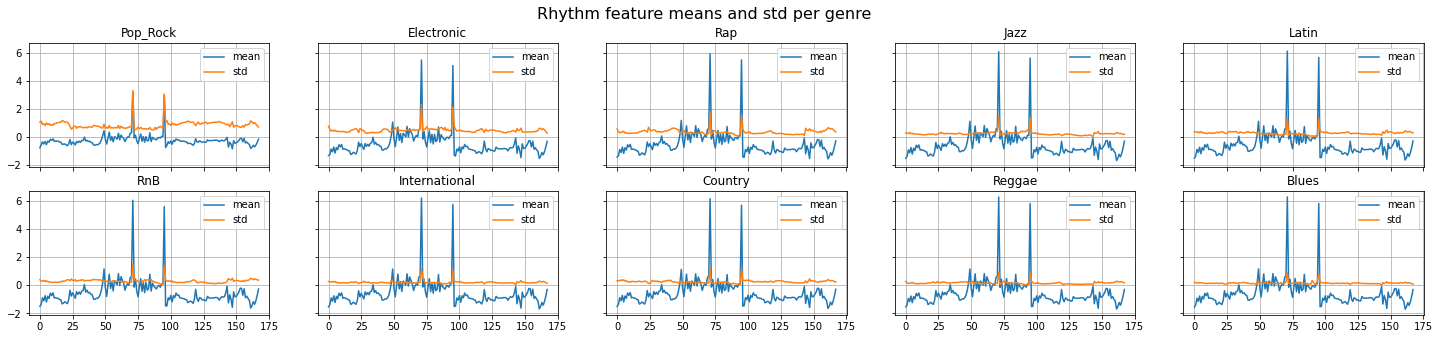

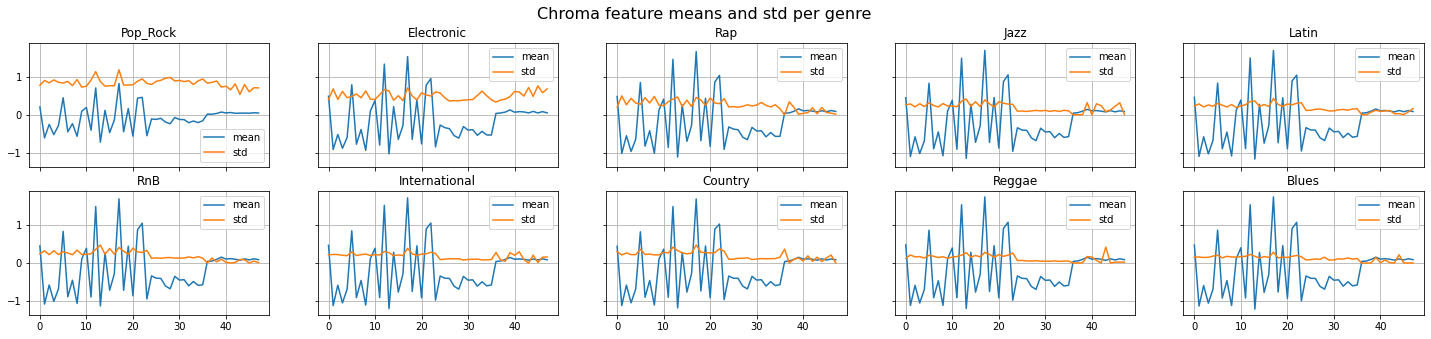

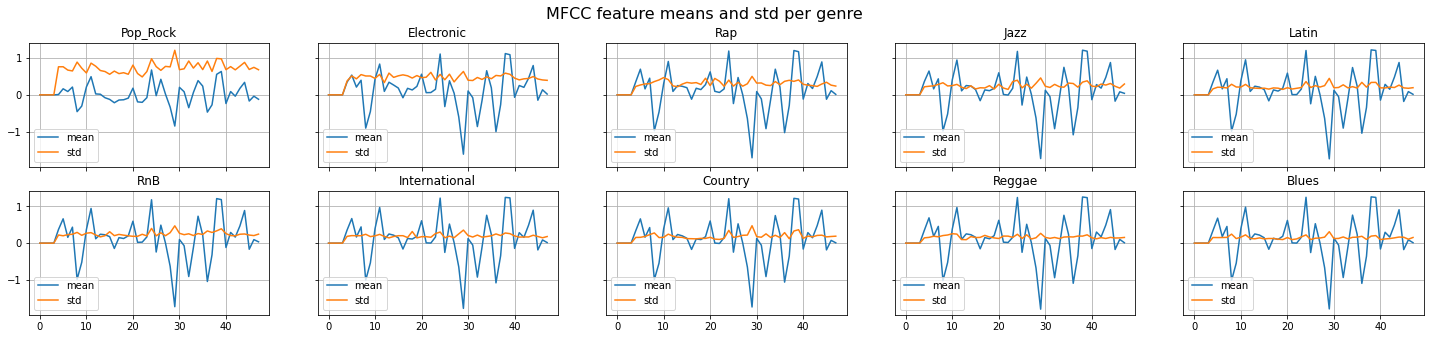

In [3]:
# 2.2 - MEAN AND STD OF THE FEATURES PER GENRE
# Divide feature space to genres - find indices of every genre
from sklearn import preprocessing

genreIndeces = np.zeros((10, train_data.shape[0]))
for g in range(1, 11):
    genre_g_Indeces = np.where(train_labels == g)[0]
    genreIndeces[g - 1,:genre_g_Indeces.shape[0]] = genre_g_Indeces #GENRE INDECES!!!
genreIndeces = genreIndeces.astype(int)

# Scale the data to zero mean and std of one
train_data_rhythm = preprocessing.scale(train_data[:,:168])
train_data_chroma = preprocessing.scale(train_data[:,168:216])
train_data_mfcc = preprocessing.scale(train_data[:,216:])

# Plot the mean and sta of every feature by genre
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 5),  sharey=True, sharex = True)
titles = ['Pop_Rock', 'Electronic', 'Rap', 'Jazz', 'Latin', 'RnB', 'International', 'Country', 'Reggae', 'Blues']
genres = [1,2,3,4,5,6,7,8,9,10]
fig.suptitle('Rhythm feature means and std per genre', fontsize=16)

for ax, title, genre in zip(axes.flat, titles, genres):
    rhythm_means = np.mean(train_data_rhythm[genreIndeces[genre - 1,:],:], axis = 0)
    rhythm_stds = np.std(train_data_rhythm[genreIndeces[genre - 1,:],:], axis = 0)
    ax.plot(rhythm_means, label =("mean"))
    ax.plot(rhythm_stds, label =("std"))
    ax.set_title(title)
    ax.grid(True)
    ax.legend()

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 5),  sharey=True, sharex = True)
fig.suptitle('Chroma feature means and std per genre', fontsize=16)

for ax, title, genre in zip(axes.flat, titles, genres):
    chroma_means = np.mean(train_data_chroma[genreIndeces[genre - 1,:],:], axis = 0)
    chroma_stds = np.std(train_data_chroma[genreIndeces[genre - 1,:],:], axis = 0)
    ax.plot(chroma_means, label =("mean"))
    ax.plot(chroma_stds, label =("std"))
    ax.set_title(title)
    ax.grid(True)
    ax.legend()
    
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 5),  sharey=True, sharex = True)
fig.suptitle('MFCC feature means and std per genre', fontsize=16)

for ax, title, genre in zip(axes.flat, titles, genres):
    mfcc_means = np.mean(train_data_mfcc[genreIndeces[genre - 1,:],:], axis = 0)
    mfcc_stds = np.std(train_data_mfcc[genreIndeces[genre - 1,:],:], axis = 0)
    ax.plot(mfcc_means, label =("mean"))
    ax.plot(mfcc_stds, label =("std"))
    ax.set_title(title)
    ax.grid(True)
    ax.legend()

**3 Methods and Experiments**

In this section, the best-scored method will be introduced. Several methods were tested for the task: logistic regression, random forest, bayes classifier. The best-scored method is logistic regression. Random forest method has overfitting problem and Bayes classifier has demonstrated poor accuracy. The poorly performed methods will be discussed in the appendix. The logistic regression method will be explained in brief here.

**3.1 Evaluation methodology**

The evaluation methodology provides means to compare the perfomance of the classification algorithms. It shows how many of the predicted labels match the actual labels. 

During the project, main evaluation index was scikit built-in "score" parameter. The trained model is evaluated based on how well the model predicts labels based on train data. It is not the best way to evaluate perfomance by using same data for training and scoring. This kind of scoring demonstrate higher score and does not represent the true perfomance of the algorithm. However, it is a faster way to evaluate the performance and compare the perfomances of different classification models.

Cross validation was tested as a perfomance evaluation approach. Unfortunately, the train data is heavily biased and some classes are poorly represented in train data. By dividing train data to test and validation data (with the ratio of 70:30), some classes are under-represented in train data. This leads to poor perfomance of the classifier. Furthermore, the data is _apriori_ divided to train and test data by the competition organizers. Due to this reason, the cross valdiation was not used in further analysis.

Finally, the master evaluation score is the test on the kaggle webpage. It is used as the final perfomance index.


**3.2 Scale the data**

The data in the feature set has the data in actual values. These kind of data sets are hard to process by the algorithms due to high variability. Scaling provides solution to the problem by scaling the data such, that the mean of the feature columns is equal to zero and the standard deviation is equal to one. Tests has shown the increase in performance of the classifier and since now all the feature sets are scaled.


**3.3 Logistic regression**

The logistic regression is widely used classification method. It has been introduced to us in this course as well and we are familiar with what is actually happening behind scikit function. Logistic regression can classify binary classes as well as multi-class data. The results can be either the classes to which the song belongs or the probability of a song belonging to each class. This allows to utilize "accuracy" and "logloss" metrix on the kaggle competition website. 

The logistic regression built-in score and the kaggle competition score were used to evaluate the performance of the classifiers. The logistic regression has scored around 76% of the train labels. The test labels on the kaggle competition scores around 65%. The score difference can be explained by the fact, that model always scores better with the trained data compared to the test data.


**3.3.1 Balanced Class Weight**

To tackle the problem of one class overpopulation, the balanced class weigths are utilized. In this case, each class (music genre) is assigned a weight, which is proportional to its population. Smaller genres, like Blues and Reggae are signed higher weights compared to Pop-Rock. Unfortunately, the balanced class weights did not improve the classification, reducing score from 76% to 68%.

In [4]:
# 3.3 LOGISTIC REGRESSION
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

def logisticRegression(X, y):
    y_ravel = np.ravel(y) #Rotate label columns into row
    #clf = LogisticRegression(solver='lbfgs', max_iter = 100, multi_class = 'ovr', C = 1).fit(X, y_ravel)
    #clf = LogisticRegression(solver='lbfgs', max_iter = 200, multi_class = 'ovr', class_weight = 'balanced').fit(X, y_ravel) #Balanced class weights
    clf = LogisticRegression(solver='lbfgs', max_iter = 200, multi_class = 'ovr').fit(X, y_ravel)
    return clf

train_data_scaled = preprocessing.scale(train_data)
clf = logisticRegression(train_data_scaled, train_labels)
y_predicted = clf.predict(train_data_scaled)
print("Prediction score:", np.round(clf.score(train_data_scaled, train_labels), 2))

Prediction score: 0.76


**4 Results**

The developed model scores on the kaggle in "accuracy" competition by **0.65053**, the 113-th position, and "logloss" competition **0.18767**, the 135-th position as per 1.11.2018.

To vizualize the results, the histogram and confusion matrix are used. The histogram consists of two histogram: the true labels and predicted labels, overlayed on top of each other. Histograms refects the cumulative number of genres classified songs. In other words, it shows how many songs were assigned to each class, but on the other hand, it is not clear whether the songs are assigned to the right genre or not. 

Based on the visual observation of the combined histogram, the model follows the true labels quite accurately. Every genre has minor difference from the true number of labels. Some genres, like Electronic and Rap, have nearly excellent number of predicted songs. 

The histogram can leave a misleading feeling about the predictedd labels. For more comprehensive prediction efficiency visualization, the confusion matrix should be plotted. The confusion matrix visualizes how many songs were misclassified. In other words, it shows how many songs of class *i* were classified as class *j*. Confusion matrix gives more clues about the misclassification of the algorithm, which helps to develop measures of increasing the accuracy. More about the clues in Section 5 below.

The histogram and confusion matrix are shown below.

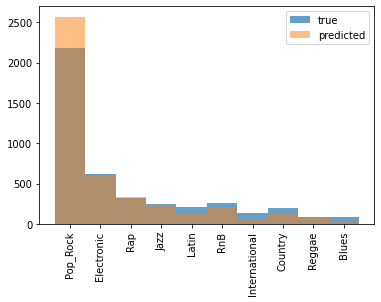

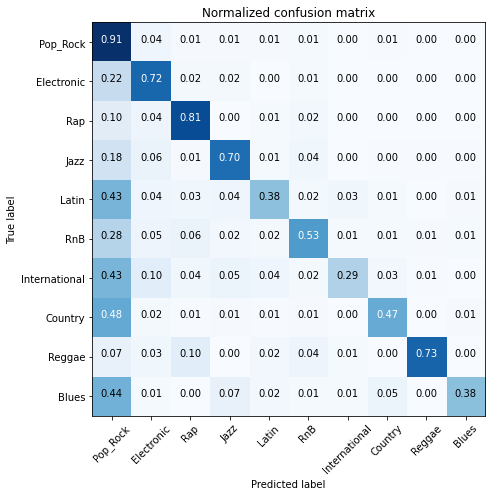

In [5]:
# 4 RESULTS
# Histogram
plotHistogramFunc(train_labels, y_predicted) #Plot histogram

# Confusion matrix
confusionMatrix(train_labels, y_predicted) #Plot confusion matrix

**5 Discussion**

**5.1 Overall accuracy**

The overall accuracy is disappointing for the authors of the work. The 65% accuracy of the test data on the kaggle webpage is somewhat low. However, the results of other competitrors are around the same bracket: 63–67% accuracy of test data. It seems, that other teams have similar problems classifying the songs as we faced and our result is not too bad, if compared.

**5.2 Biased data**

It would be important to mention the biased data once more. The Pop-Rock genre is overepresented. Scoring 100% for just Pop-Rock genre would result in ca. 50% accuracy. However, our team aimed to score all the genres. Half of the genres were classified with over 50% accuracy, while the rest half was classification accuracy was less than 50%. Some music genres bear similar sound and thus classifying them is hard.

As it can be seen on the *Features per genre* figures, the Pop-Rock genre tend to have higher std compared to other genres. This shows the high volatility of the genre, meaning it does not have it's "face", its character is hard to specify and describe.

**5.3 Pop-Rock genre**

The confusion matrix clearly revealed an anomaly in the prediction results. Most of the misclassified songs were classified as Pop-Rock songs. It can be seen as the first column of predicted labels - Pop-Rock genre collects the songs form other genres. It could be explained by the overpopulated label. However, balanced class weights did not solve the issue of songs being mislabeled as Pop-Rock.

**5.4 Insufficient amount of training data**

The issue could be addressed from the other side - the misclassified genres are underpopulated. The low number of songs in commonly mislabeled genres does not provide enough information for the model training. It is known that, the model requires sufficient amount of data to be trained properly and model gets more accurate in cases where the number of training data is high.

**5.5 The goal**

The goal of the work is to apply machine learning methods for classification of songs into genres. As per our opition, the developed algorithm works for the given goal. However, the accuracy is not as good as we were expecting. Machine learning is a absolutely new field for both of us and we have learned a lot during the course of this project.

**5.6 Future work**

There are several things that could be done in order to inprove the results of the prediction. The authors of the work see the solution in deeply digging into the train data. The data should be pre-processed to find the clear correletaions between some features and Pop-Rock genre. The clear boundary between Pop-Rock genre and the other genres should be found. 

Possibly, the classification could be done only with the rhythm or MFCC data only, as it is stated in some similar works. However, our test shows the increased accuracy in case of utilization of all three data structures.


**References**

[1] Silla, C.N., Koerich, A. L., Kaestner, C. A. A.: A Machine Learning Approach to Automatic Music Genre Classification, _Journal of the Brazilian Computer Society_, Vol. 14 no. 3, pp. 7-18

[2] Downie, J. S., Cunningham S.J.: Toward a theory of music information retrieval queries: system design implications, _Proceedings of the 3rd International Conference on Music Information Retrieval, 2002_, pp. 299–300

[3] Lee, J. H., Downie, J. S.: Survey of music information needs, uses, and seeking behaviours preliminary findings, _Proceedings of the 5th International Conference on Music Information Retrieval, 2004_, pp. 441–446

[4] Pampalk, E., Rauber, A., Merkl, D.: Content-Based organization and visualization of music archives, _Proceedings of ACM Multimedia, 2002_, pp. 570–579

[5] Tzanetakis, G., Cook, P.: Musical genre classification of audio signals, _IEEE Transactions on Speech and Audio Processing, 2002_, Vol. 10 no. 5, pp: 293–302

[6] Vignoli, F.:. Digital music interaction concepts: a user study,  _Proceedings of the 5th International Conference on Music Information Retrieval, 2004_, pp: 415–420

[7] Kosina, K.: Music Genre Recognition, MSc. Dissertation, 2002, Fachschule Hagenberg

[8] Rathore, A., Dorido, M.: Music Genre Classification, Online: https://cse.iitk.ac.in/users/cs365/2015/_submissions/archit/report.pdf, Accessed: 28-10-2018

[9] Krizhevsky, A., Sutskever, I., Hinton, G. E.: Imagenet classification with deep convolutional
neural networks, _Advances in neural information processing systems_, pp: 1097-1105

[10] Breiman, L.: Random Forests, _Machine Learning_, Vol. 45 no. 1, pp:5-32

[11] Friedman, J. H.: Grredy function approximation: a gradient boosting machine, _Annals of Statistics_, pp: 1189-1232

[12] Géron, A., 2017: Hands-On Machine Learning with Scikit-Learn & TensorFlow, 1st edn, O'Reilly: Sebastopol

[13] Müller, A. C., Guido, S., 2016: Introduction to Machine Learning with Python, 1st edn, O'Reilly: Sebastopol

[14] Alpaydin, E.: Introduction to Machine Learning, The MIT Press: Cambridge

[15] Kirk, A., 2014: Thoughtful Machine Learning, 1st edn, O'Reilly: Sebastopol



**Appendix**

In appendix section we will bring out the algorithms, methods and tricks that we tried, but did not improve the result. Topics will be listed below and each will have short description and piece of code. Topics range from data pre-processing to classification methods.

**A1 Logistic regression - one vs. the rest**

The logistic regression method was run 10 times. At each iteration, it classififed one gerne vs the rest genres. The classified songs were then stored accordingly to the predicted labels matrix. The result did not improve - it stayed below the 76% mark of the logistic regression.

Prediction score of genre 1 : 0.82
Prediction score of genre 2 : 0.92
Prediction score of genre 3 : 0.97
Prediction score of genre 4 : 0.97
Prediction score of genre 5 : 0.96
Prediction score of genre 6 : 0.95
Prediction score of genre 7 : 0.97
Prediction score of genre 8 : 0.97
Prediction score of genre 9 : 0.99
Prediction score of genre 10 : 0.99
Prediction score of all genres: 0.72


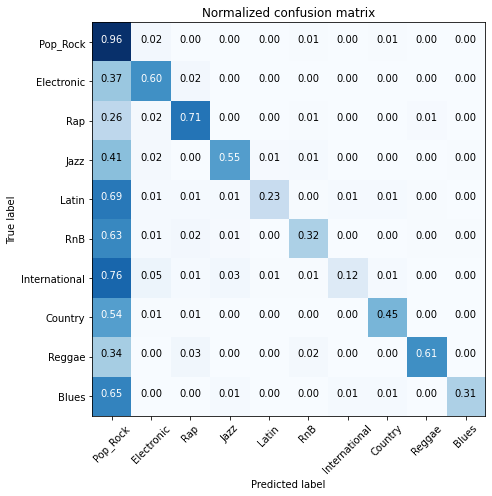

In [6]:
# LOGISTIC REGRESSION - ONE VS REST
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

X = train_data
X_norm = preprocessing.scale(X, axis = 0)
y = train_labels
y_pred_master = np.zeros((X.shape[0], 1))

for g in range(1,11): # Do logistic regression for each genre
    y_bin = np.zeros((y.shape[0], 1))
    y_bin.astype(int)
    y_bin[y == g] = 1
    clf_g = LogisticRegression(solver='lbfgs', max_iter = 100, multi_class = 'ovr').fit(X_norm, y_bin)
    y_pred = clf_g.predict(X_norm)
    print("Prediction score of genre", g, ":", np.round(clf_g.score(X_norm, y_bin), 2))
    y_pred_master[y_pred == 1,0] = y_pred[y_pred == 1] * g

y_pred_master[y_pred_master == 0] = 1

confusionMatrix(y, y_pred_master)
print("Prediction score of all genres:", np.round(np.mean(y_pred_master == y), 2))

**A2 Random forest**

The random forest classification algorithm is based on decision tree construction approach. The random forest suffers due to overfitting - the train labels are predicted extremely well, but test data has quite poor prediction.
Note that random forest does not requie to scale the data - scaling makes random forest algorithm less accurate.


Prediction score: 0.99


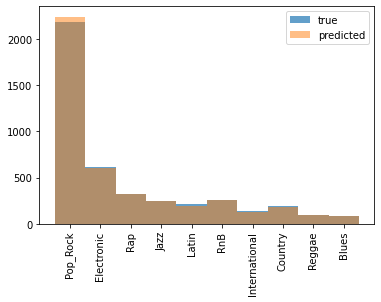

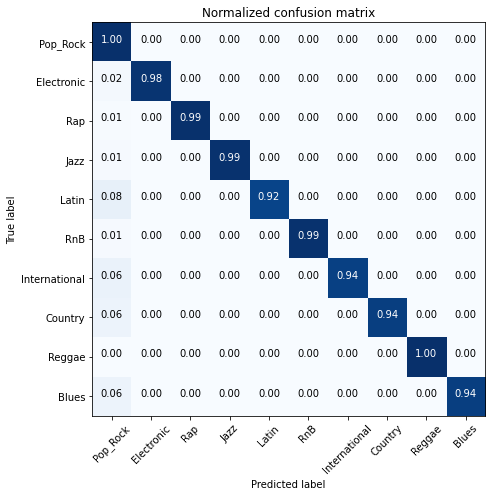

In [7]:
# RANDOM FOREST
#from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

X_scale = train_data
y = train_labels
y_ravel = np.ravel(y) #Rotate label columns into row

clf = RandomForestClassifier(max_features = 100, oob_score = 'True', max_depth = 15)
clf.fit(X, y)

y_predicted = clf.predict(X_scale)

print("Prediction score:", np.round(clf.score(X_scale, y), 2))

plotHistogramFunc(y, y_predicted)
confusionMatrix(y, y_predicted)

**A3 Bayes classifier**

Bayes classifier is a classification method based on probabilistic approach. It is good at stochastic modelling and Monte Carlo simulations. However, it performs poorly at our task, showing poor results.

Prediction score: 0.36


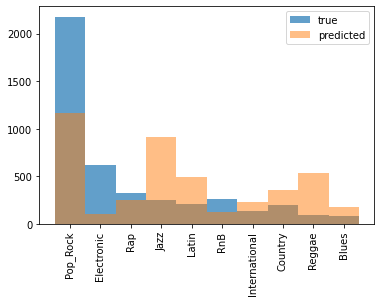

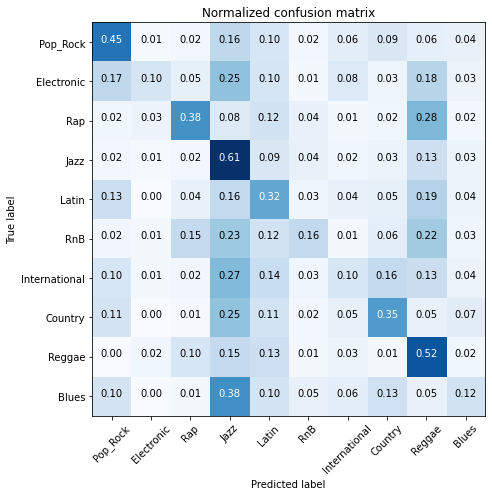

In [8]:
# BAYES CLASSIFIER
from sklearn.naive_bayes import GaussianNB

X_scale = train_data
y = train_labels
y_ravel = np.ravel(y) #Rotate label columns into row

clf = GaussianNB()
clf.fit(X_scale, y_ravel)

y_pred = clf.predict(X_scale)

print("Prediction score:", np.round(clf.score(X_scale, y), 2))

plotHistogramFunc(y, y_pred)
confusionMatrix(y, y_pred)

**A4 Logistic regression - feature scores**

In this section, we try to plot the scores of each feature in order to evalueate it's importance in genre definition. On the plot below, the scores are shown, each color represents the music genre. If the score is close to zero, then it is not important and has no effect on classification.

As it turns out, that the features nr. 220 have score of zero. It means that, these features have absolutely no use in logistic regression classification and they could be removed from the feature set and thus, reduce the problem dimensionality. It turns out that the feature plots, shown in Section 2.2, were indeed having the same message - features in "MFCC mean"-area have no impact on classification.

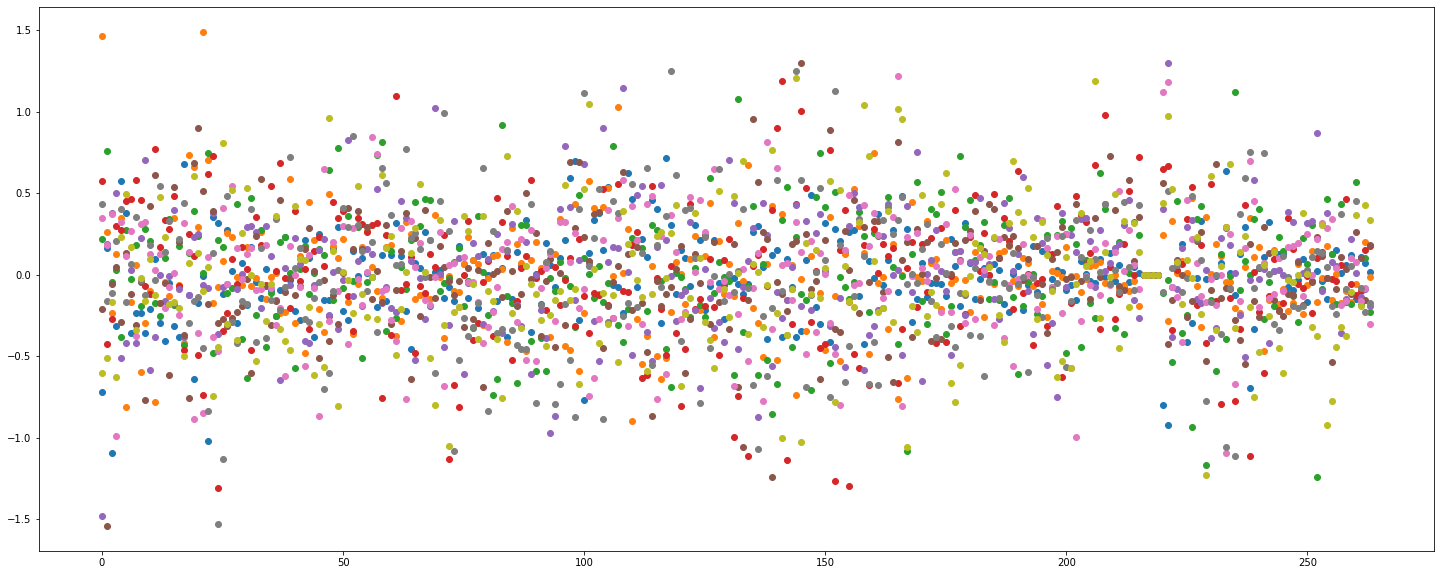

In [9]:
train_data_scaled = preprocessing.scale(train_data)

clf = logisticRegression(train_data_scaled, train_labels)
coefficients = clf.coef_[:9,:]

plt.figure(figsize=(25, 10))
plt.plot(coefficients.T, 'o')
plt.show()

**A5 Dimensionality reduction - PCA**

The principle component analysis is tested to reduce the dimensionality of the feature set. Based on the previous plot - the feature score - we were able to assume that the "MFCC mean"-area can be excluded from the feature set. In order to achieve that, the desired number of principal components was set to the 252, which is equal to number of features minus number of "MFCC mean"-bands. 
The PCA dimensionality reduction did not increase the prediction accuracy.


252 principal components cover variety of: 1.0 %.
Prediction score: 0.76


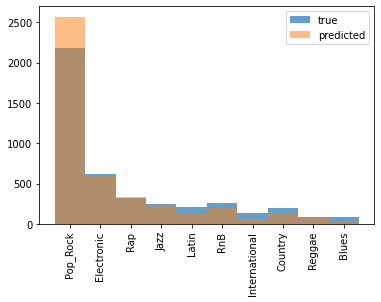

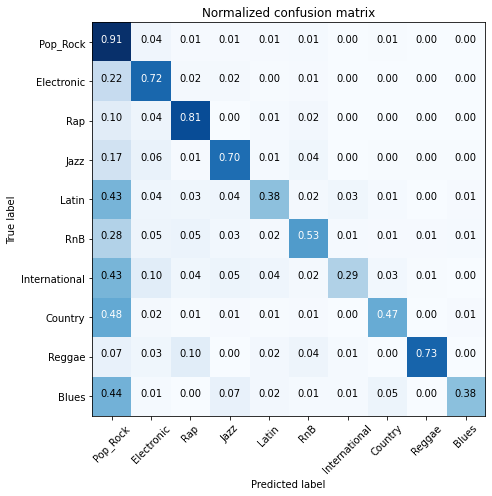

In [10]:
# PRE-PROCESS DATA - DIMENSIONALITY REDUCTION
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca = PCA(n_components = 252)
X = preprocessing.scale(train_data)
train_data_scores = pca.fit_transform(X)

print("252 principal components cover variety of:", np.round(np.sum(pca.explained_variance_ratio_[:252]),4), "%.")

clf_pca = logisticRegression(train_data_scores, train_labels)
train_labels_predicted_scores = clf_pca.predict(train_data_scores)
print("Prediction score:", np.round(clf_pca.score(train_data_scores, train_labels), 2))

plotHistogramFunc(train_labels, train_labels_predicted_scores) #Plot histogram
confusionMatrix(train_labels, train_labels_predicted_scores)

**A6 Semi-supervized learning**

The idea behind semi-supervized learning is simple, but clever. First, the model is trained with train data. Secondly, the test labels are predicted. Next comes the most important part - the train and test data are combined, as well as train and predicted test labels. Finally, the model is being trained again, using the combined data and labels.

Unfortunately in our case, the technique did not yield result imprevement, staying around 74%.

Prediction score: 0.74


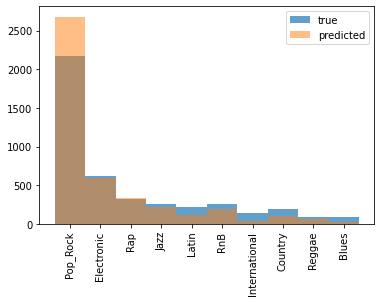

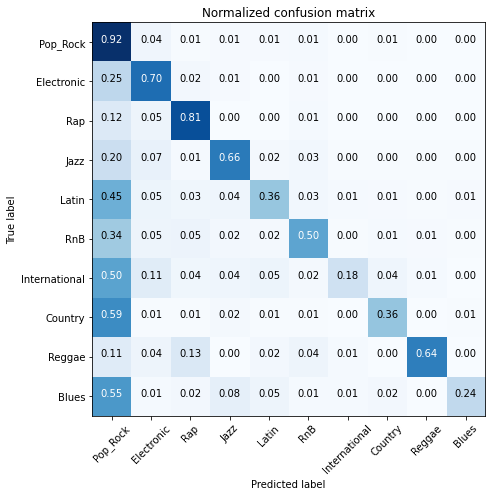

In [11]:
# SEMI-SUPERVISED LEARNING
from sklearn import preprocessing

train_data_scaled = preprocessing.scale(train_data)
clf = logisticRegression(train_data_scaled, train_labels) #Train the model with train data
test_data_scaled = preprocessing.scale(test_data)
test_labels_predict = clf.predict(test_data_scaled) #Predcit the test labels based on the first model

train_data_ssl = np.vstack((train_data, test_data)) #Stack together train and test data
train_data_ssl_scaled = preprocessing.scale(train_data_ssl)

test_labels_predict = np.reshape(test_labels_predict,(len(test_labels_predict),1))
train_labels_ssl = np.vstack((train_labels, test_labels_predict)) #Stack together train labels and predicted test labels

clf_ssl = logisticRegression(train_data_ssl_scaled, train_labels_ssl) #Train new model with combined data and labels
train_labels_predict = clf_ssl.predict(train_data_scaled) #Predict the labels for TRAIN DATA once more, to check the perfomance
print("Prediction score:", np.round(clf_ssl.score(train_data_scaled, train_labels), 2))

plotHistogramFunc(train_labels, train_labels_predict) #Plot histogram
confusionMatrix(train_labels, train_labels_predict) #Plot confusion matrix

**A7 Upscale the minority data**

In this section we try to upscale the underrepresented data. The genres, that have too little number of songs can upscaled - meaning songs from the genre can be copy-pasted to the train data. In that way, the train data size increases by having more songs. The advantage of this method is that the underepresented classes will have more features. On the other hand, created songs are just the copies and they do not truly add new value to the model.

In the following example we have upscaled the International genre (genre nr. 7). It has scored the poorest - 29% of the songs belonging to that genre were indentified correctly. The total number of songs is one of the smallest - 141 songs. The songs of that genre will be copy-pasted until the number songs reach 326, which is the number of third most represented genre - Rap. This way we want to mitigate the unfairness in the feature set.

Unfortunately, the results are not improved. By upscaling one genre, the prediction of that particualar genre gets better. On the other hand, the accuracy of the other genres falls. Result did not improve.

Prediction score: 0.76


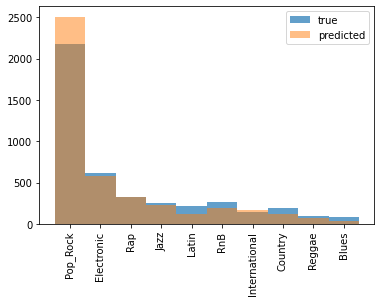

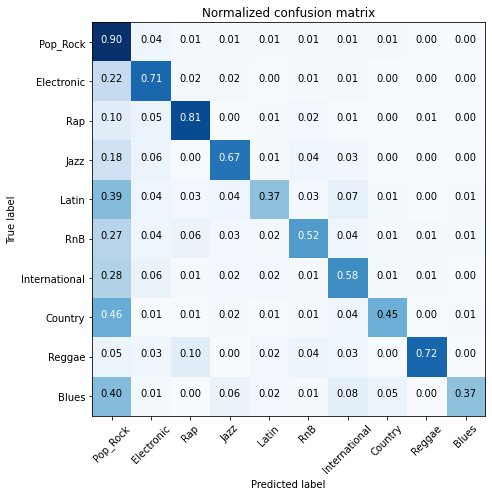

In [12]:
# UPSCALING MINORITY DATA
from sklearn import preprocessing
from sklearn.utils import resample

g = 7 #Genre to upscale
n_upscale = 326
X = train_data
y = train_labels
X_scale = preprocessing.scale(X)
indices = np.where((y == g))[0] #Find indices of the chosen genre
X_blues = X_scale[indices, :]
y_blues = y[indices]

X_blues_ups = resample(X_blues, n_samples = n_upscale) #Upscale the chosen genre

indices1 = np.where(y != g)[0] #Choose indicces, that do not belong to the genre
X_new = np.vstack((X_scale[indices1, :], X_blues_ups)) #Create new data set with songs not belonging and new songs of the chosen data
y_new = np.vstack((y[indices1, :], np.ones((n_upscale, 1))*g)) #Do same for labels

clf = logisticRegression(X_new, y_new) #Train model with upscaled data and labels
y_predicted = clf.predict(X_scale) #Predict new labels for train data
print("Prediction score:", np.round(clf.score(X_scale, y), 2))

plotHistogramFunc(y, y_predicted)
confusionMatrix(y, y_predicted)

**A8 Remove outliers**

In this part we tried to remove outliers from the data set. We defined outliers as a feature value, which is bigger or smaller than mean value plus twice of standard deviation. This method is widely used in statistical applicarions. However, in our work, it decreased the accuracy of prediction. The extreme left or right values are actually used as a distinctive features of some classes. Thus if distinctive features, like high values, are removed, the accuracy decreases.

The accuracy resulted in 72%.

Prediction score: 0.72


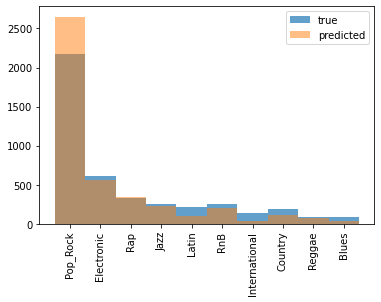

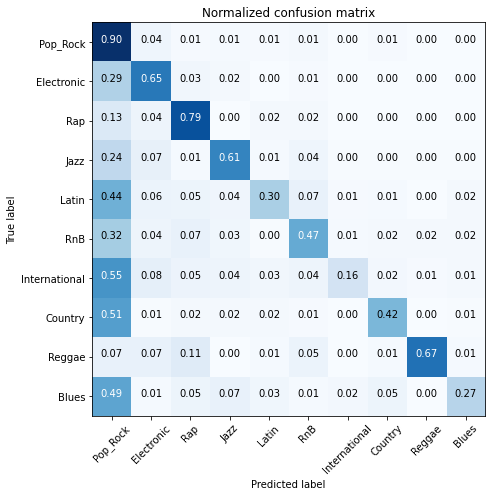

In [13]:
# REMOVE OUTLIERS
from sklearn import preprocessing

X = train_data
y = train_labels
X_scale = preprocessing.scale(X)
xMean = np.mean(X_scale, axis = 0) #Find mean of features, in column
xSTD = np.std(X_scale, axis = 0) #Find std off features, in column as well
problems = np.abs(X_scale) > xMean + 2*xSTD #Find features with value over mean + 2*std
row, col = np.where(problems)
X_scale[row, col] = 0 #Assign a zero value to selected features

y_ravel = np.ravel(y) #Rotate label columns into row
clf = logisticRegression(X_scale, y_ravel) #Train model with upscaled data and labels
y_predicted = clf.predict(X_scale) #Predict new labels for train data

print("Prediction score:", np.round(clf.score(X_scale, y_ravel), 2))
plotHistogramFunc(y, y_predicted)
confusionMatrix(y, y_predicted)